<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/08_3_Visualization_of_CNN%2C%20Functionl%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [2]:
from tensorflow import keras

In [3]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-02-23 06:12:00--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-02-23 06:12:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2023-02-23 06:12:01 (53.6 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [5]:
model = keras.models.load_model('best-cnn-model.h5')

In [6]:
model.layers

In [9]:
# 첫 번째 합성곱 층의 가중치를 조사하면,
# weights 속성에 층의 가중치와 절편이 저장되어 있으
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# (3, 3)의 커널의 깊이가 1, 필터 개수가 32개이므로 weights 의 첫 번째 원소인 가중치의 크기 32 (32,)

(3, 3, 1, 32) (32,)


In [11]:
# 텐서플로의 다차원 배열인 Tensor 클래스의 객체 weights를 numpy() 메소드를 이용해 넘파이 배열로 변환
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
# 가중치의 평균은 0과 가깝고, 표준편차는 0.23 정도

-0.021033935 0.23466988


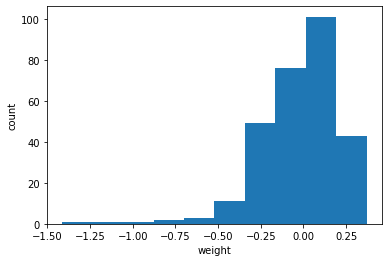

In [13]:
# 이를 훈련하기 전의 가중치와 비교하기 위해 히스토그램을 그려보면,
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))    # hist() 메소드는 히스토그램을 그리기 위해서 1차원 배열로 전달해야하므로 1개의 열이 있는 1차원 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

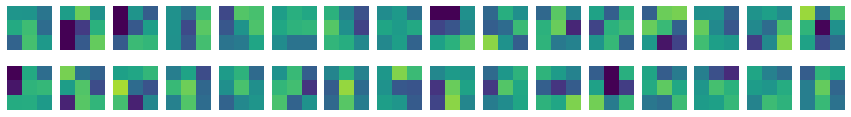

In [15]:
# 32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):    # i는 0~1
  for j in range(16):   # j는 0~15
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)    
    # conv_weights[:,:,0,0] ~ conv_weights[:,:,0,31]까지 출력, vmin, vmax는 컬러맵으로 표현한 범위 지정, 기준이 될 절댓값을 지정한 것
    axs[i,j].axis('off')
plt.show()

## 비교할 빈 합성곱 신경망 만들기

In [16]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [18]:
# 첫 번째 층의 가중치를 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [19]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
# 표준편차가 줄어듦

-0.010310263 0.0773888


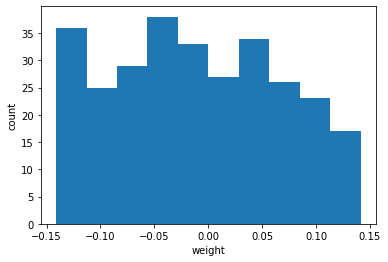

In [21]:
# 가중치 배열을 히스토그램으로 표현하면,
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

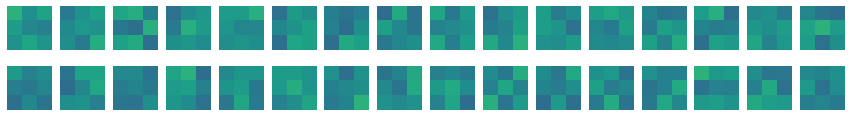

In [24]:
# 32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):    # i는 0~1
  for j in range(16):   # j는 0~15
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)    
    # no_training_weights[:,:,0,0] ~ no_training_weights[:,:,0,31]까지 출력, vmin, vmax는 컬러맵으로 표현한 범위 지정, 기준이 될 절댓값을 지정한 것
    axs[i,j].axis('off')
plt.show()

# 가중치가 크게 차이 나지 않음 > 훈련이 제대로 되지 않음

# 함수형 API
      입출력이 다수일 때 Sequential보다 함수형 API를 사용하는 것이 용이함

In [29]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [34]:
# 합성곱 신경망의 입력과 출력만을 가져와 새로운 모델도 만들 수 있음
conv_acti = keras.Model(model.input, model.layers[0].output)
# model 객체의 predcit()메소드를 호출하면 최종 출력층의 확률을, predict() 메소드 사용시 첫 번째 Conv2D의 출력을 반환할 것

## 특성 맵 시각화

4422102/4422102 [==============================] - 0s 0us/step


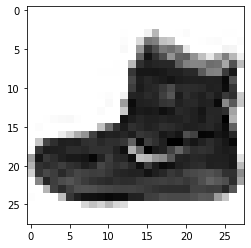

In [35]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
# predict() 메소드는 항상 1차원 배열을 기대하기에 해당 데이터를 차원 변환 후 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 1s 525ms/step


In [37]:
print(feature_maps.shape)   # 첫 번째 차원은 배치 차원(첫 번째 축), 샘플 하나를 입력했기에 1이 됨

(1, 28, 28, 32)


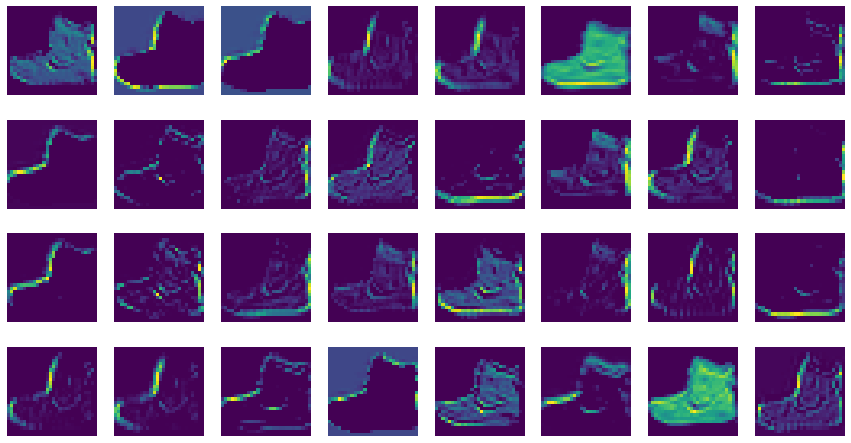

In [39]:
# 특성 맵을 그려보면,
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()
# 특성맵이 강하게 활성화한 부분을 볼 수 있음

In [40]:
# 두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인해 보면,
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [41]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 85ms/step


In [42]:
print(feature_maps.shape)

(1, 14, 14, 64)


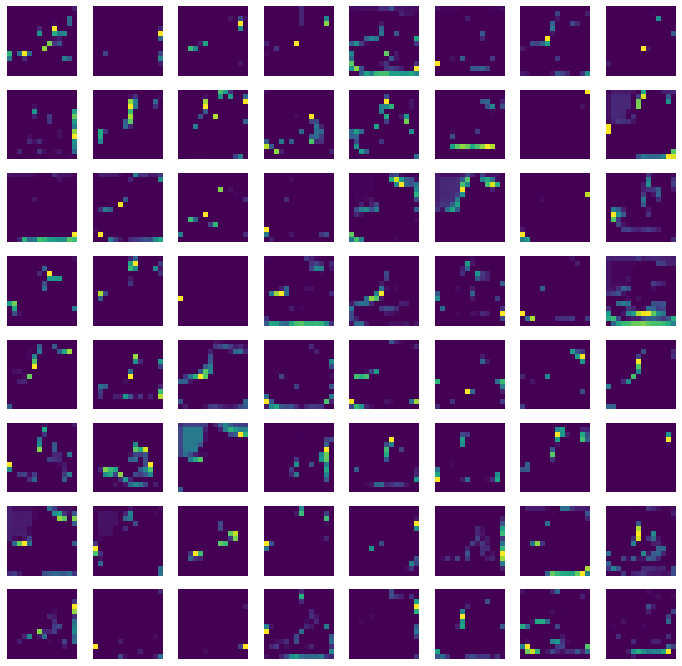

In [43]:
fig,axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

# 두 번째 합성곱 층의 필터 크기는 (3,3,32)로, 첫 필터가 앞서 출력한 32개 특성 맵과 곱해져 두 번째 합성곱 층의 첫 특성 맵이 되므로 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 지고간적 이해가 어려움
# 합성곱 층이 쌓일수록 이러한 현상이 심해짐
# 선위한 합성곱 층은 이미지의 시각정 정보를 감지, 후위한 층은 그를 바탕으로 추상적 정보를 학습함을 알 수 있음(세부적 정보)

# 전체 소스코드

# 합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [ ]:
from tensorflow import keras

In [ ]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-05-19 01:28:27--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-05-19 01:28:28--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: 'best-cnn-model.h5.2'

best-cnn-model.h5.2 100%[===================>]   3.86M  --.-KB/s    in 0.08s   

2022-05-19 01:28:28 (47.6 MB/s) - 'best-cnn-model.h5.2' saved [4049416/4049416]



In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

2022-05-19 01:28:28.480940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.layers

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.021033935 0.23466988


In [ ]:
import matplotlib.pyplot as plt

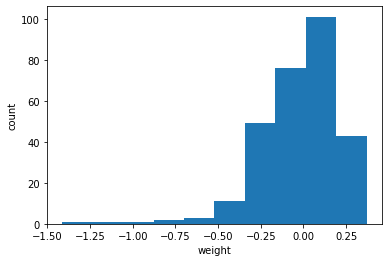

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

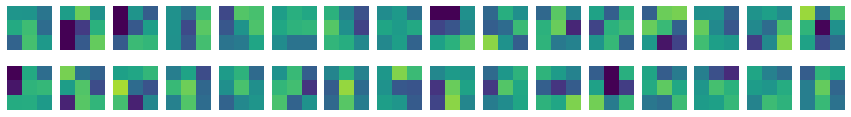

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.0029798597 0.08092386


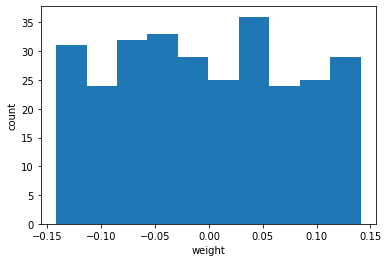

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

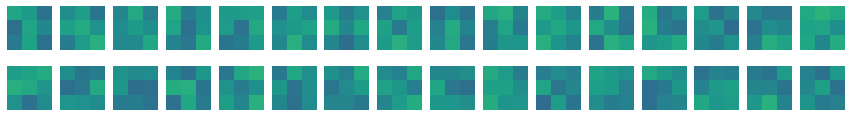

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

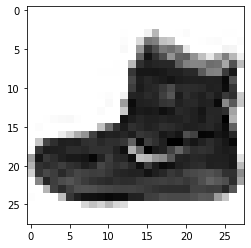

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 235ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


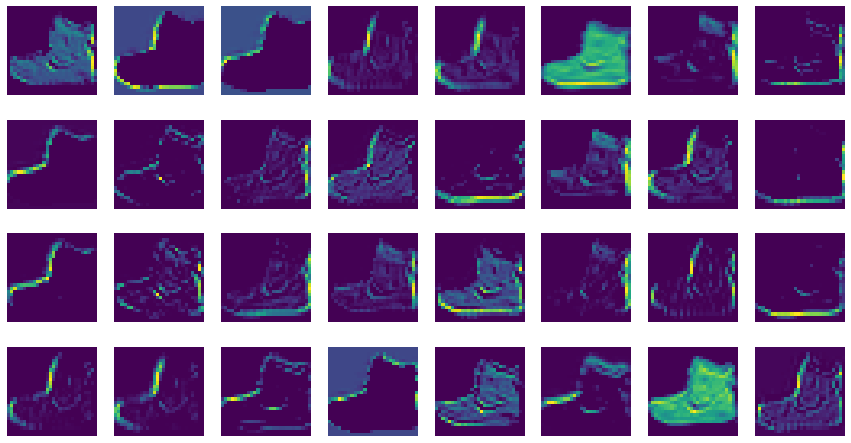

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 72ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


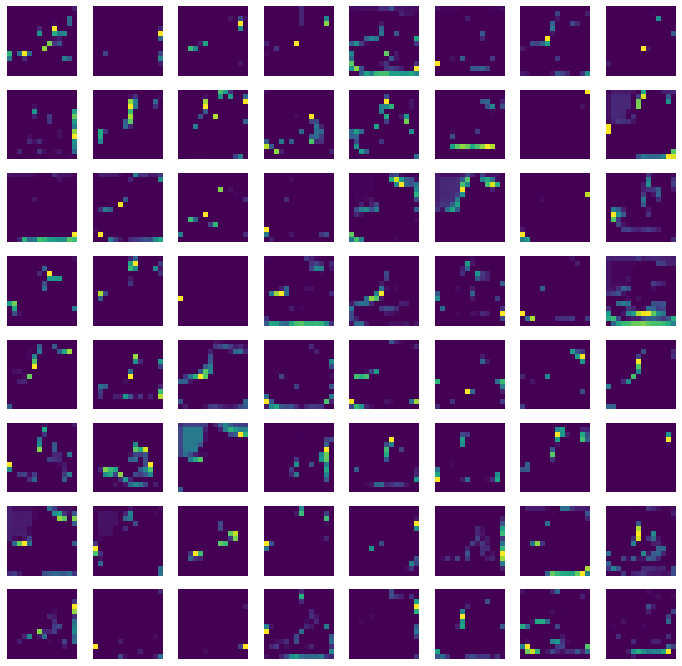

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

# 총 정리

## 키워드

### 가중치 시각화
      합성곱 층의 가중치를 이미지로 출력하는 것
      합성곱 신경망은 주로 이미지를 다루기에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음

### 특성 맵 시각화
      합성곱 층의 활성화 출력을 이미지로 그리는 것
      가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있음

### 함수형 API
      케라스에서 신경망 모델을 만드는 방법 중 하나
      *입 출력이 다수일 때 Sequential()보다 용이*
      Model 클래스에 모델의 입력과 출력을 지정함
      전형적으로 입력은 Input()함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의함

## 핵심 패키지와 함수

### TensorFlow

#### Model
      케라스 모델을 만드는 클래스
      첫 매개변수인 inputs에 모델의 입력 또는 입력의 리스트를 지정
      두 번째 매개변수인 outputs에 모델의 출력 또는 출력의 리스트를 지정
      name 매개변수에 모델의 이름을 지정
      ex) conv2_acti = keras.Model(model.input, model.layers[2].output)

## 팁

*   입, 출력이 다수 일 때에는 함수형 API를 이용해볼 것
*   Sequential 모델에서 첫 번째 합성곱 층의 output은 두 번째 합성곱 층의 input임, 이는 모델의 입력이 아닌 동작 과정의 일부로 이해하기!

    model.layers[0].output은 모델의 입력을 바르게 참조한 것이 아님!

    
    model.layers[0].input
    model._layers[0].input
    model._layers[0].output
    은 Sequential 모델의 입력을 제대로 참조한 것이 맞음